In [538]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, SplineTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#### Training and Test Data

In [539]:
df = pd.read_csv("../files/BRISTOR_Zegoland_all_%.csv")

In [540]:
df.head()

,Country,Data type,Measure,Product,Date,Value,demandA,demandB,demandCompA,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB,voiceShareA,voiceShareB
0,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,2021-11-01,56305.84,50690.626885,2.000000,3.614874e+06,0.013829,0.05,0.001,0.01,0.000,0.064742,0.094000
1,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,2021-12-01,35581.00,50570.861295,54.000000,3.602962e+06,0.013842,0.06,0.021,0.01,0.001,0.087327,0.137000
2,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,2022-01-01,41136.88,50917.380645,86.814883,3.601168e+06,0.013942,0.05,0.026,0.01,0.002,0.071527,0.169975
3,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,2022-02-01,41689.80,50780.830461,117.704204,3.373471e+06,0.014830,0.04,0.041,0.02,0.004,0.083018,0.086413
4,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,2022-03-01,54587.28,62515.496098,175.611087,3.723241e+06,0.016513,0.05,0.028,0.02,0.005,0.059830,0.167177


### Set Order Date as Index

In [541]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

df.head()

,Country,Data type,Measure,Product,Value,demandA,demandB,demandCompA,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB,voiceShareA,voiceShareB
Date,,,,,,,,,,,,,,,
2021-11-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,56305.84,50690.626885,2.000000,3.614874e+06,0.013829,0.05,0.001,0.01,0.000,0.064742,0.094000
2021-12-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,35581.00,50570.861295,54.000000,3.602962e+06,0.013842,0.06,0.021,0.01,0.001,0.087327,0.137000
2022-01-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,41136.88,50917.380645,86.814883,3.601168e+06,0.013942,0.05,0.026,0.01,0.002,0.071527,0.169975
2022-02-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,41689.80,50780.830461,117.704204,3.373471e+06,0.014830,0.04,0.041,0.02,0.004,0.083018,0.086413
2022-03-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,54587.28,62515.496098,175.611087,3.723241e+06,0.016513,0.05,0.028,0.02,0.005,0.059830,0.167177


### Range of Order Data

In [542]:
max_date = df.index.max()
min_date = df.index.min()

print(f"Maximum order date is {max_date}")
print(f"Minimum order date is {min_date}")
print(f"Total time span is around {(max_date.year - min_date.year)} years")

Maximum order date is 2024-05-01 00:00:00
Minimum order date is 2021-11-01 00:00:00
Total time span is around 3 years


In [543]:
df.head()

,Country,Data type,Measure,Product,Value,demandA,demandB,demandCompA,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB,voiceShareA,voiceShareB
Date,,,,,,,,,,,,,,,
2021-11-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,56305.84,50690.626885,2.000000,3.614874e+06,0.013829,0.05,0.001,0.01,0.000,0.064742,0.094000
2021-12-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,35581.00,50570.861295,54.000000,3.602962e+06,0.013842,0.06,0.021,0.01,0.001,0.087327,0.137000
2022-01-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,41136.88,50917.380645,86.814883,3.601168e+06,0.013942,0.05,0.026,0.01,0.002,0.071527,0.169975
2022-02-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,41689.80,50780.830461,117.704204,3.373471e+06,0.014830,0.04,0.041,0.02,0.004,0.083018,0.086413
2022-03-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,54587.28,62515.496098,175.611087,3.723241e+06,0.016513,0.05,0.028,0.02,0.005,0.059830,0.167177


In [ ]:
X=df.iloc[:,9:14]
y=df.iloc[:,5:6]


In [ ]:
X

,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB
Order Date,,,,,
2021-11-01,0.013829,0.05,0.001,0.01,0.000
2021-12-01,0.013842,0.06,0.021,0.01,0.001
2022-01-01,0.013942,0.05,0.026,0.01,0.002
2022-02-01,0.014830,0.04,0.041,0.02,0.004
2022-03-01,0.016513,0.05,0.028,0.02,0.005
2022-04-01,0.017154,0.05,0.025,0.02,0.005
2022-05-01,0.017713,0.04,0.024,0.02,0.006
2022-06-01,0.018761,0.04,0.032,0.02,0.006
2022-07-01,0.019007,0.05,0.035,0.02,0.007


In [ ]:
from sklearn.preprocessing import PowerTransformer

y=y.values
X=X.values  

pow=PowerTransformer()
y= pow.fit_transform(y.reshape(-1, 1))


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (24, 5)
X_test shape: (7, 5)
y_train shape: (24, 1)
y_test shape: (7, 1)


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('spline', SplineTransformer(degree=3, n_knots=2)),
    ('ridge', Ridge(alpha=0.1))  # Step 2: Fit a linear regression model
])


In [ ]:
# Define the parameter grid
param_grid = {
    'spline__degree': [2, 3, 4],
    'spline__n_knots': [2, 3, 4],
    'ridge__alpha': [0.01, 0.1, 1, 10]
}

# Run grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

In [ ]:
best_params, best_score

({'ridge__alpha': 0.1, 'spline__degree': 3, 'spline__n_knots': 2},
 0.34649225956643426)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('spline', SplineTransformer(n_knots=2)),
                ('ridge', Ridge(alpha=0.1))])

In [ ]:
pred_values_train= pipeline.predict(X_train)   

y_train= pow.inverse_transform(y_train)
pred_train = pow.inverse_transform(pred_values_train)

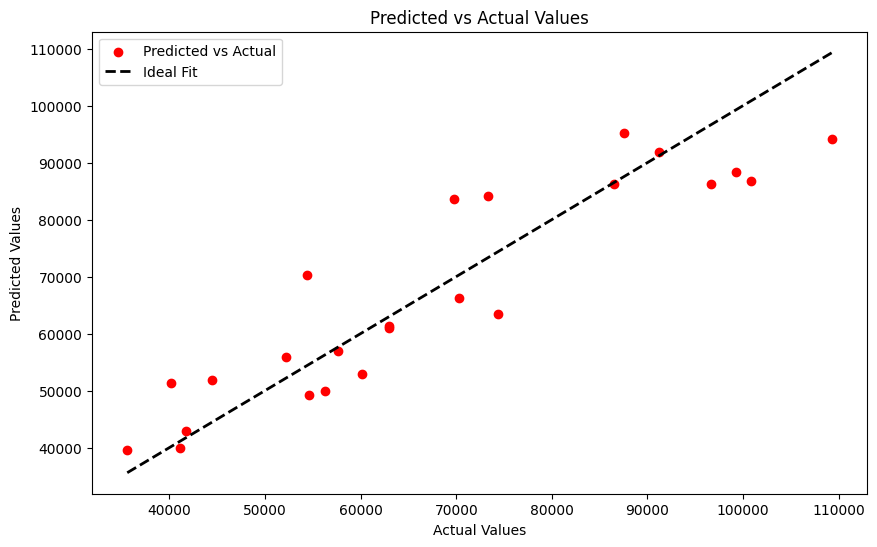

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, pred_train, color='red', label='Predicted vs Actual')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [ ]:
pred_values_test= pipeline.predict(X_test)   

y_test = pow.inverse_transform(y_test)
pred_test = pow.inverse_transform(pred_values_test)

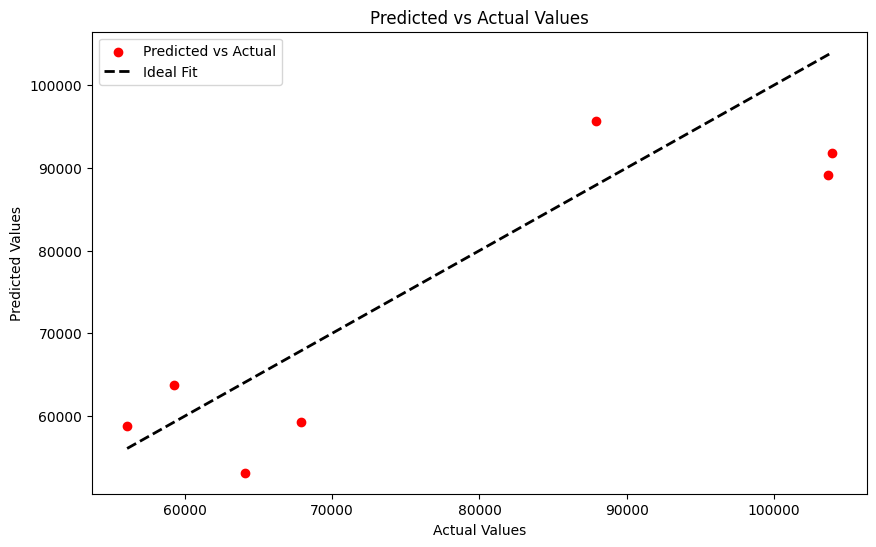

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_test, color='red', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import root_mean_squared_error

rmse=root_mean_squared_error(y_test, pred_values_test)

rmse

79867.67070564163

In [ ]:
from sklearn.preprocessing import PowerTransformer

pow=PowerTransformer()
y_trans= pow.fit_transform(y_train)

y_trans



array([[ 1.43723325],
       [-0.09387291],
       [-0.4402233 ],
       [-0.53564479],
       [ 0.43747793],
       [-1.45703303],
       [-0.09286395],
       [-0.36838856],
       [ 0.92826193],
       [-1.80859699],
       [-1.38621607],
       [ 1.2959086 ],
       [-1.34688271],
       [ 0.23300508],
       [ 1.71171791],
       [-0.54886802],
       [ 0.96989372],
       [ 0.39044747],
       [-1.1584985 ],
       [-0.67629442],
       [ 0.25691816],
       [ 1.10332431],
       [ 1.38595202],
       [-0.23675714]])

/var/folders/0f/7pcrwybx3_zfsnzs2qjgxp8h0000gn/T/ipykernel_15075/2185964080.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_trans, shade=True)


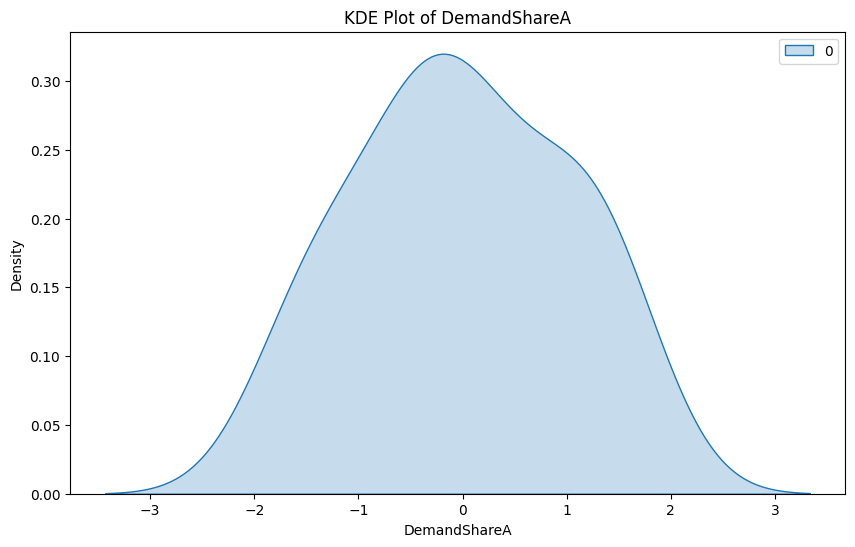

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_trans, shade=True)
plt.title('KDE Plot of DemandShareA')
plt.xlabel('DemandShareA')
plt.ylabel('Density')
plt.show()

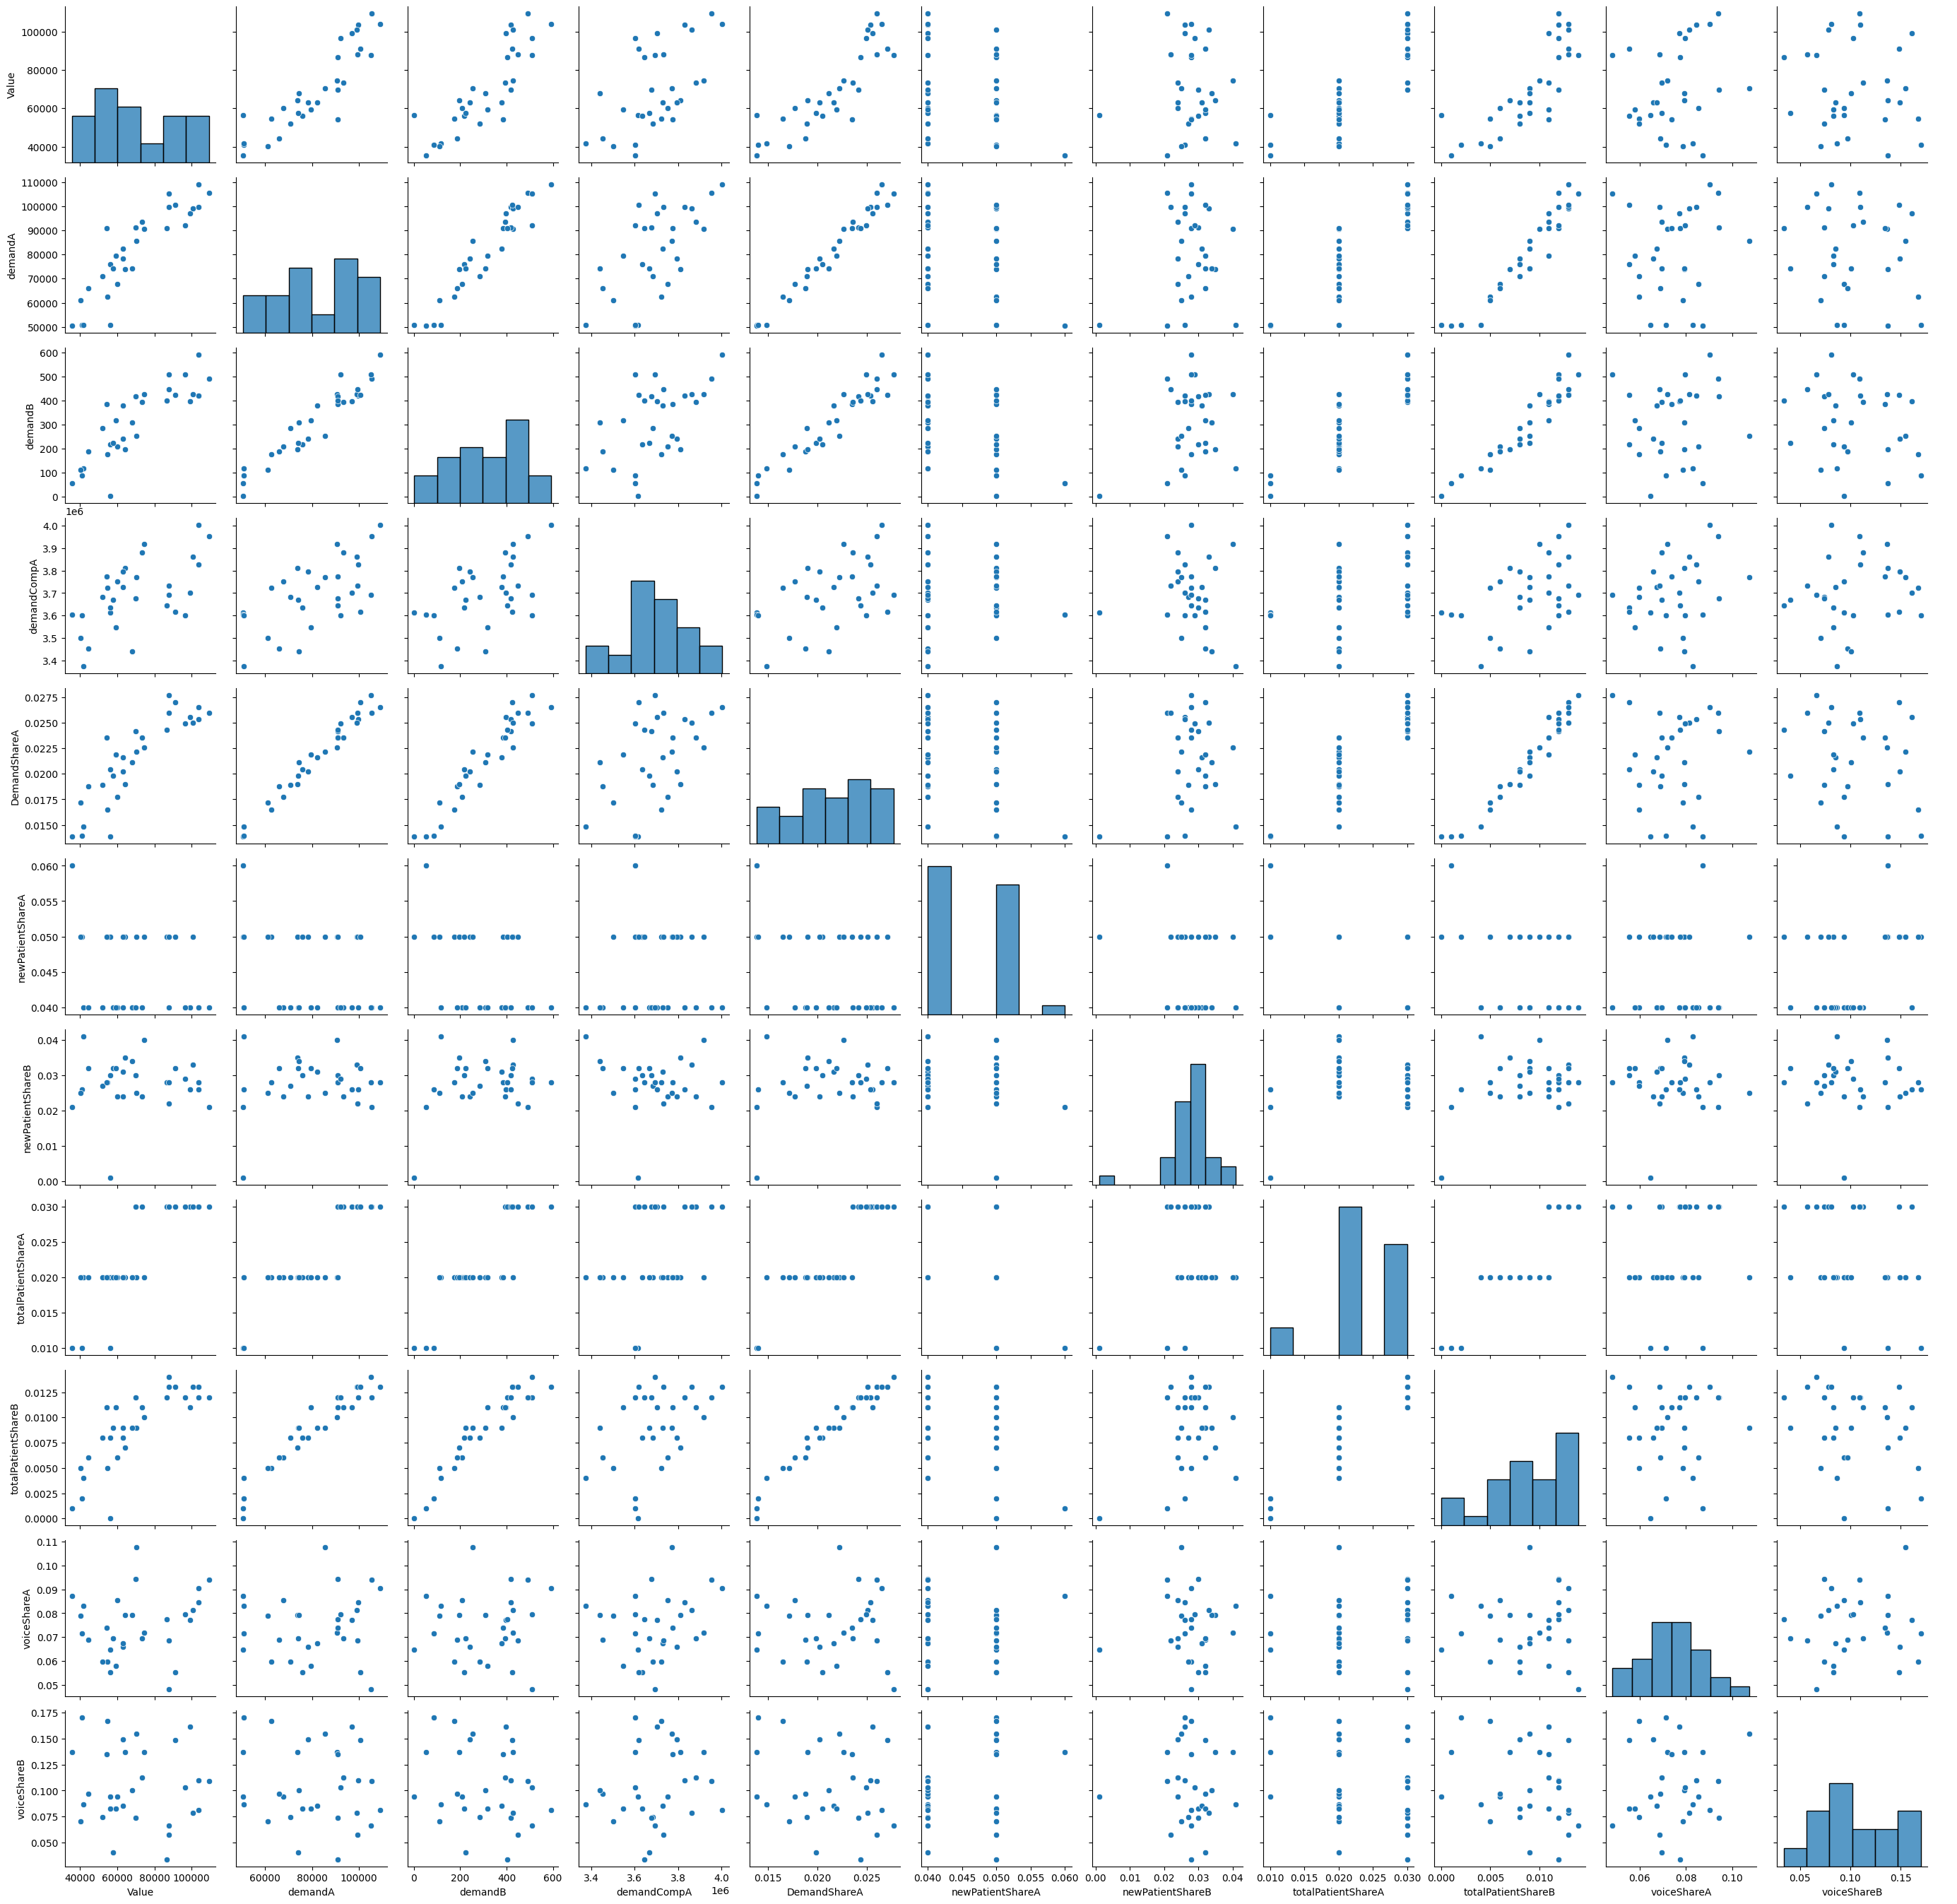

In [ ]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

### Neural Network

In [560]:
X=df.iloc[:,9:14]
y=df.iloc[:,5:6]

In [ ]:
# Define a test size
test_size = 12

# Create train and test sets
train_set = y[:-test_size]
test_set = y[-test_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate a scaler with a feature range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
# Normalize the training set
y_norm= scaler.fit_transform(train_set.reshape(-1, 1))

In [554]:
import torch
import torch.nn as nn
import torch.optim as optim

In [555]:
class Values(nn.Module):

    def __init__(self, input_size=1, hidden_size=100, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        self.hidden = (torch.zeros(1, 1, self.hidden_size),
                       torch.zeros(1, 1, self.hidden_size))
    def forward(self, seq):
        out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(out.view(len(seq), -1))
        return pred[-1]

In [556]:
n_input = 12
n_nodes = 100
mlp_model  = Values(n_input, n_nodes)

In [557]:
#loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(mlp_model.parameters())

In [ ]:
#convert datatype
train_x, train_y = torch.tensor(X, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)

### RNN

In [630]:
df = pd.read_csv("../files/BRISTOR_Zegoland_all_%.csv")

In [631]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

df.head()

,Country,Data type,Measure,Product,Value,demandA,demandB,demandCompA,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB,voiceShareA,voiceShareB
Date,,,,,,,,,,,,,,,
2021-11-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,56305.84,50690.626885,2.000000,3.614874e+06,0.013829,0.05,0.001,0.01,0.000,0.064742,0.094000
2021-12-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,35581.00,50570.861295,54.000000,3.602962e+06,0.013842,0.06,0.021,0.01,0.001,0.087327,0.137000
2022-01-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,41136.88,50917.380645,86.814883,3.601168e+06,0.013942,0.05,0.026,0.01,0.002,0.071527,0.169975
2022-02-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,41689.80,50780.830461,117.704204,3.373471e+06,0.014830,0.04,0.041,0.02,0.004,0.083018,0.086413
2022-03-01,Zegoland,Ex-factory volumes,Milligrams,BRISTOR,54587.28,62515.496098,175.611087,3.723241e+06,0.016513,0.05,0.028,0.02,0.005,0.059830,0.167177


In [632]:
X=df.iloc[:,8:13]
y=df.iloc[:,5:6]

X

,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB
Date,,,,,
2021-11-01,0.013829,0.05,0.001,0.01,0.000
2021-12-01,0.013842,0.06,0.021,0.01,0.001
2022-01-01,0.013942,0.05,0.026,0.01,0.002
2022-02-01,0.014830,0.04,0.041,0.02,0.004
2022-03-01,0.016513,0.05,0.028,0.02,0.005
2022-04-01,0.017154,0.05,0.025,0.02,0.005
2022-05-01,0.017713,0.04,0.024,0.02,0.006
2022-06-01,0.018761,0.04,0.032,0.02,0.006
2022-07-01,0.019007,0.05,0.035,0.02,0.007


In [633]:
y=df.iloc[:,4:5]
y.head()

,Value
Date,
2021-11-01,56305.84
2021-12-01,35581.00
2022-01-01,41136.88
2022-02-01,41689.80
2022-03-01,54587.28


In [634]:

X=df.iloc[:,8:13]

X.head()

,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB
Date,,,,,
2021-11-01,0.013829,0.05,0.001,0.01,0.000
2021-12-01,0.013842,0.06,0.021,0.01,0.001
2022-01-01,0.013942,0.05,0.026,0.01,0.002
2022-02-01,0.014830,0.04,0.041,0.02,0.004
2022-03-01,0.016513,0.05,0.028,0.02,0.005


In [635]:


data=pd.concat([y,X],axis=1)

data.head()

,Value,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB
Date,,,,,,
2021-11-01,56305.84,0.013829,0.05,0.001,0.01,0.000
2021-12-01,35581.00,0.013842,0.06,0.021,0.01,0.001
2022-01-01,41136.88,0.013942,0.05,0.026,0.01,0.002
2022-02-01,41689.80,0.014830,0.04,0.041,0.02,0.004
2022-03-01,54587.28,0.016513,0.05,0.028,0.02,0.005


### LSTM

In [639]:
df = data.astype('float32')


In [640]:
df.dtypes

Value                 float32
DemandShareA          float32
newPatientShareA      float32
newPatientShareB      float32
totalPatientShareA    float32
totalPatientShareB    float32
dtype: object

In [654]:
num_rows = df.shape[0]

num_rows

31

In [651]:
from numpy import array, split

In [658]:
def split_dataset(data):
    #split into standard weeks
    train, test = data[1:-5], data[-5:-1]
    

    return train, test